Following
- Chapter 3. Step 3: Funcamentals of Machine Learning, [*Mastering Machine Learning with Python in Six Steps*][ml6s] (Copyright &copy; Manohar Swamynathan 2019)
<!-- - https://github.com/Apress/mastering-ml-w-python-in-six-steps-2e (
Copyright &copy; 2019 Manohar Swamynathan) -->

---

Machine Learning Perspective of Data
====================================
> *Data* is the facts and figures (can also be referred to as *raw data*) that we have available with respect to the business context. Data is made up of two aspects:
> 1. *Objects* such as people, tree, animals, etc.
> 2. *Attributes* that were recorded for objects such as age, size, weight, cost, etc.


Feature Engineering
===================
Dealing with Missing Data
-------------------------
> Missing data can mislead or create problems for analyzing the data. In order to avoid any such issues, you need to impute missing data. There are four most commonly used techniques for data imputation:
> - Delete
> - Replace with the summary (*mean*, *mode* or *medan* for a respective column)
> - Random replace
> - Use a predictive model


Handling Categorical Data
-------------------------
### Create a dummy varaible
(Boolean) 1 for presence of a category, and 0 for absence. You should create *k*-1 dummy variables, where *k* is the number of levels.

Scikit-learn provides a useful function, *One Hot Encoder*, to create a dummy variable for a given categorical variable.


[ml6s]: https://doi.org/10.1007/978-1-4842-4947-5

In [1]:
import pandas as pd
# from patsy import dmatrices
df = pd.DataFrame({'A': ['high', 'medium', 'low'],
                    'B': [10,20,30]},
                    index=[0, 1, 2])
df

,A,B
0,high,10
1,medium,20
2,low,30


In [2]:
df_with_dummies = pd.get_dummies(df, prefix="A", columns=['A'])
df_with_dummies

,B,A_high,A_low,A_medium
0,10,1,0,0
1,20,0,0,1
2,30,0,1,0


### Convert to number
Another simple method is to represent the text description of each level with a number by using the *Label Encoder* function of Scikit-learn.

In [3]:
df['A_pd_factorized'] = pd.factorize(df['A'])[0]

# Alternatively you can use sklearn's method LabelEncoder
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
df['A_LabelEncoded'] = le.fit_transform(df.A)
df


,A,B,A_pd_factorized,A_LabelEncoded
0,high,10,0,0
1,medium,20,1,2
2,low,30,2,1


Mormalizing Data
----------------
> Bringing all the different types of variable units in the same order of magnitude eliminates the potential outlier measurements that would misrepresent the finding and negatively affect the accuracy of the conclusion. Two broadly used methods for rescaling data are *normaliztion* and *standardization*.

> Normalizing data can be achieved by min-max scaling:
\begin{equation}
X_\text{normalized} = \frac{X - X_\text{min}}{X_\text{max} - X_\text{min}}
\end{equation}
>> **Note**: Be sure to remove extreme outliers before applying the preceding technique, as it can skew the normal values in your data to a small interval.

> The standardization technique will transform the variables to have *zero mean* and *standard deviation of one* (the outcome is commonly known as *z*-scores):
\begin{equation}
Z = \frac{X - \mu}{\sigma}
\end{equation}
> where $\mu$ is the mean and $\sigma$ the standard deviation.

> Standardization often has been the preferred method for various analysis, as it tells us where each data point lies within its distribution and gives a rough indication of outliers.


In [4]:
from sklearn import datasets, preprocessing
import numpy as np

iris = datasets.load_iris()
X = iris.data[:, [2, 3]]
y = iris.target

std_scale = preprocessing.StandardScaler().fit(X)
X_std = std_scale.transform(X)

minmax_scale = preprocessing.MinMaxScaler().fit(X)
X_minmax = minmax_scale.transform(X)

print('Mean before standardization: petal length={:+.1f}, petal width={:+.1f}'.format(X[:, 0].mean(), X[:, 1].mean()))
print(' SD  before standardization: petal length={:+.1f}, petal width={:+.1f}'.format(X[:, 0].std(), X[:, 1].std()))

print('Mean after  standardization: petal length={:+.1f}, petal width={:+.1f}'.format(X_std[:, 0].mean(), X_std[:, 1].mean()))
print(' SD  after  standardization: petal length={:+.1f}, petal width={:+.1f}'.format(X_std[:, 0].std(), X_std[:, 1].std()))

print('\nMin value before min-max scaling: petal length={:+.1f}, petal width={:+.1f}'.format(X[:, 0].min(), X[:, 1].min()))
print('Max value before min-max scaling: petal length={:+.1f}, petal width={:+.1f}'.format(X[:, 0].max(), X[:, 1].max()))

print('Min value after  min-max scaling: petal length={:+.1f}, petal width={:+.1f}'.format(X_minmax[:, 0].min(), X_minmax[:, 1].min()))
print('Max value after  min-max scaling: petal length={:+.1f}, petal width={:+.1f}'.format(X_minmax[:, 0].max(), X_minmax[:, 1].max()))

Mean before standardization: petal length=+3.8, petal width=+1.2
 SD  before standardization: petal length=+1.8, petal width=+0.8
Mean after  standardization: petal length=-0.0, petal width=-0.0
 SD  after  standardization: petal length=+1.0, petal width=+1.0

Min value before min-max scaling: petal length=+1.0, petal width=+0.1
Max value before min-max scaling: petal length=+6.9, petal width=+2.5
Min value after  min-max scaling: petal length=+0.0, petal width=+0.0
Max value after  min-max scaling: petal length=+1.0, petal width=+1.0


Feature Construction or Genration
---------------------------------
### Exploratory Data Analysis
> EDA is all about understanding your data by employing summarizing and visualizing techniques. At a high level, EDA can be performed in two ways:
> - univariate analysis
> - multivariate analysis

![Iris: sepal and petal](https://thegoodpython.com/assets/images/iris-species.png)
> The Iris dataset is a well-known dataset used extensively in pattern recognition literature. It is hosted at the [UC Irvine Machine Learning Repository](https://archive.ics.uci.edu/ml/datasets/Iris/). The data set contains petal length, petal width, sepal length, and sepal width measurement for three types of Iris flowers: Setosa, Versicolor, and Virginica.

#### Univariate Analysis
> Individual variables are analyzed in isolation to get a better understanding of them.

In [5]:
# Convert ndarray to dataframe
iris = pd.DataFrame(data = np.c_[iris['data'], iris['target']], columns = iris['feature_names'] + ['species'])

# Replace the values with class labels
iris.species = np.where(iris.species==0., 'setosa', np.where(iris.species==1., 'versicolor', 'virginica'))

iris.describe()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.057333,3.758000,1.199333
std,0.828066,0.435866,1.765298,0.762238
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


> The columns 'species' is categorical, so let's check the frequency distribution for each category.

In [6]:
iris['species'].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

Text(0.5, 0.98, 'Histogram')

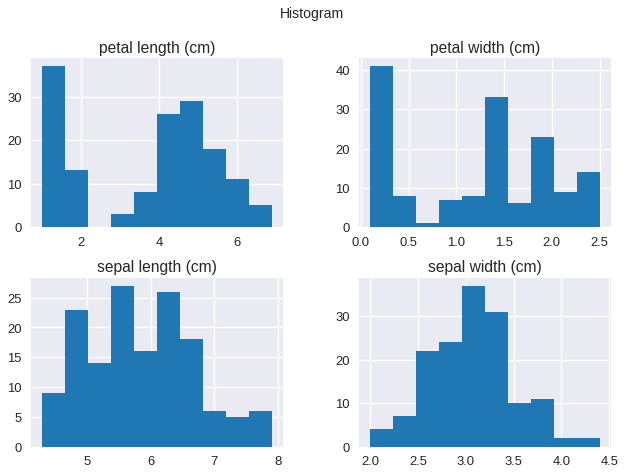

In [7]:
import matplotlib.pyplot as plt

plt.style.use(['seaborn-talk', 'seaborn-darkgrid'])
title_sz = 14

iris.hist()     # plot histogram
plt.suptitle("Histogram", fontsize=title_sz)  # add title to all subplots

Text(0.5, 1.0, 'Bar Plot')

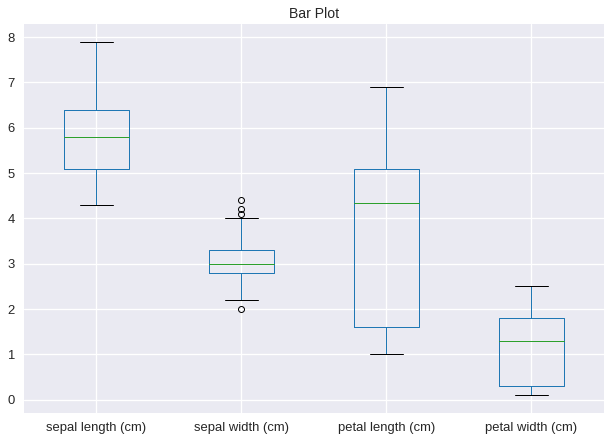

In [8]:
fig, ax = plt.subplots()

iris.boxplot()  # plot boxplot
ax.set_title("Bar Plot", fontsize=title_sz)

#### Multivariate Analysis

(array([0, 1, 2]),
 [Text(0, 0, 'setosa'), Text(1, 0, 'versicolor'), Text(2, 0, 'virginica')])

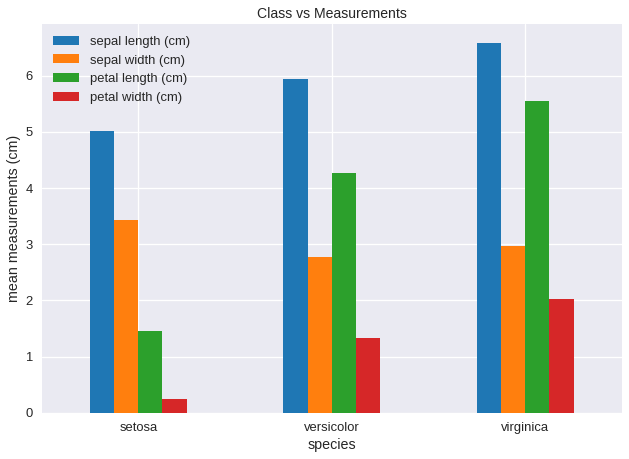

In [9]:
# Get the mean for each column by species
iris_species_mean = iris.groupby(by="species").mean()

# Plot for mean of each feature for each label class
iris_species_mean.plot(kind="bar")

plt.title("Class vs Measurements", fontsize=title_sz)
plt.ylabel("mean measurements (cm)")
plt.xticks(rotation=0)      # manage the xticks rotation

#### Correlation Matrix
> The correlation function uses a Pearson correlation coefficient, which results in a number between -1 to 1. A strong negative relationship is indicated by a coefficient closer to -1 and a strong positive correlation is indicated by a coefficient toward 1.

In [10]:
# Create correlation matrix
corr = iris.corr()
corr

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),1.000000,-0.117570,0.871754,0.817941
sepal width (cm),-0.117570,1.000000,-0.428440,-0.366126
petal length (cm),0.871754,-0.428440,1.000000,0.962865
petal width (cm),0.817941,-0.366126,0.962865,1.000000


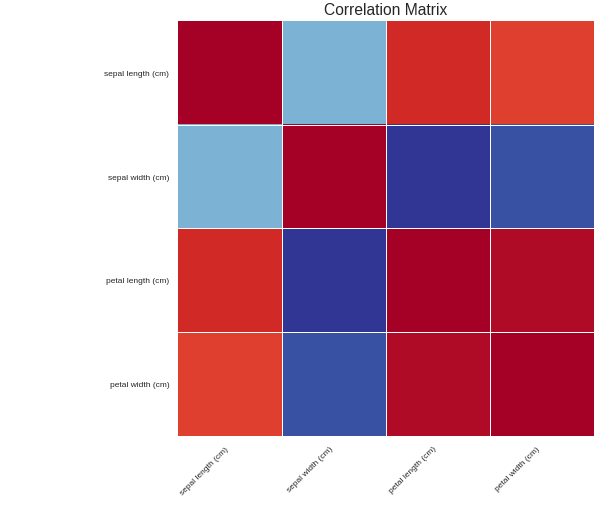

In [11]:
import statsmodels.api as sm
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.grid(which='major')

#### Pair Plot

Text(0.5, 0.98, 'Pair Plot')

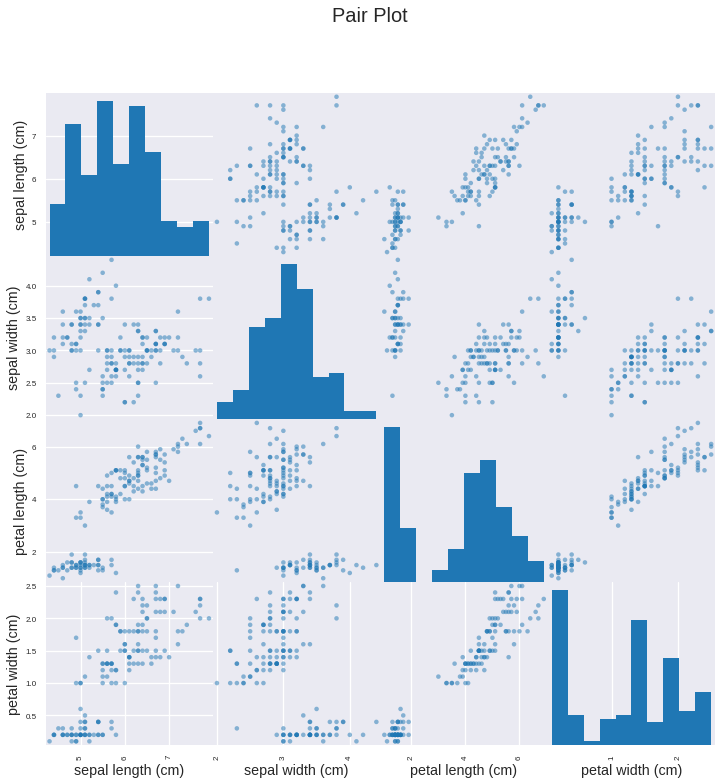

In [12]:
pd.plotting.scatter_matrix(iris, figsize=(12, 12))

# Use suptitle to add title to all subplots
plt.suptitle("Pair Plot", fontsize=20)

Supervised Learning-Regression
==============================
> Let's consider a use case where we have collected students' average test grade scores and their respective average studied hours for the test from a group of similar IQ students.

In [13]:
# Load data
df = pd.read_csv("../data/Grade_Set_1.csv")
df

,Hours_Studied,Test_Grade
0,2,57
1,3,66
2,4,73
3,5,76
4,6,79
5,7,81
6,8,90
7,9,96
8,10,100


<AxesSubplot:title={'center':'Grade vs Hours Studied'}, xlabel='Hours_Studied', ylabel='Test_Grade'>

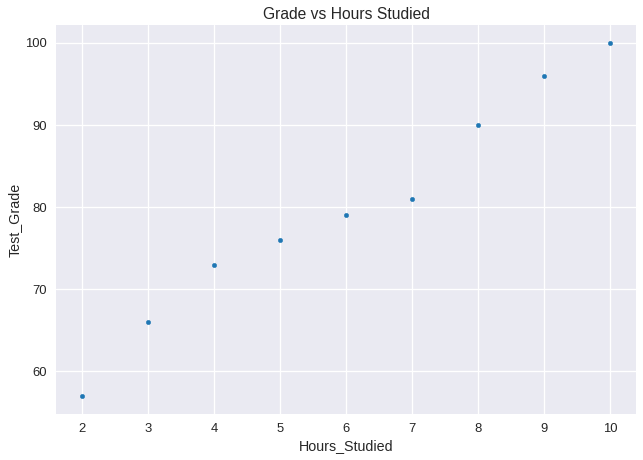

In [14]:
# Simple scatter plot
df.plot(kind="scatter", x="Hours_Studied", y="Test_Grade", title="Grade vs Hours Studied")

In [15]:
print("Correlaton Matrix:")
df.corr()

Correlaton Matrix:


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.987797
Test_Grade,0.987797,1.000000


Correlation and Causation
-------------------------
> Although correlation helps us determine the degree of relationship between two or more variables, it does **not** tell us about the *cause and effect* relationship.

Fitting a Slope
---------------
(The least square method)

Intercept:    49.67777777777776
Coefficient:  [5.01666667]


Text(0.5, 0, 'Hours_Studied')

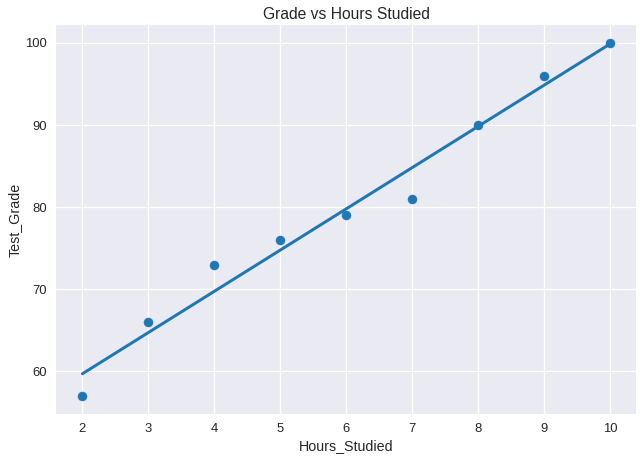

In [16]:
import sklearn.linear_model as lm

# Create a linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied[:, np.newaxis]    # independent variable
y = df.Test_Grade.values               # dependent variable

# Train the model using the training sets
lr.fit(x, y)
print("Intercept:   ", lr.intercept_)
print("Coefficient: ", lr.coef_)

# Plot the fit line
plt.scatter(x, y)
plt.plot(x, lr.predict(x), linewidth=3)
plt.title("Grade vs Hours Studied")
plt.ylabel("Test_Grade")
plt.xlabel("Hours_Studied")

In [17]:
x_i = 6.

try:
    k = float(input("Please assign the slope (k): "))
    b = float(input("Please assign the intercept (b): "))
    y_mp = k * x_i + b
    # Manual prediction for a given value of x
    print("Manual prediction:", y_mp)
except:
    pass

# Predict using the built-in function
print("Using predict function:", lr.predict([[x_i]])[0])

Manual prediction: 80.0
Using predict function: 79.77777777777777


How Good Is Your Model?
-----------------------
> There are three metrics widely used for evaluating linear model performance:
- R-Squared
- Root Mean Squared Error
- MAE

### R-Squared for Goodness of fit
> The *R-Squared* metric is the most popular practice of evaluating how well your model fits the data.
\begin{align}
\text{R-squared} =& \frac{\text{Total Sum of Square Residual}}{\text{Sum of Square Total}} \\
&= \frac{\sum_i (\hat{y}_i - \bar{y})^2}{\sum_i (y_i - \bar{y})^2} \\
&\in (0, 1]
\end{align}


### Root Mean Squared Error
\begin{equation}
\text{RMSE} = \sqrt{\frac{1}{n} \sum_{i=1}^n (y_i - \hat{y}_i)^2}
\end{equation}
> One of the key properties of RMSE is that the unit will be the same as the target variable.

### Mean Absolute Error
\begin{equation}
MAE = \frac{1}{n} \sum_{i=1}^n |y_i - \hat{y}_i|
\end{equation}

In [18]:
# Functions to calculate r-squared, MAE, and RMSE
from sklearn.metrics import r2_score, mean_absolute_error, mean_squared_error

# Add the predict value to the dataframe
y_p = lr.predict(x)
df['Test_Grade_Pred'] = y_p
y_m = np.mean(y)
R = np.sum((y_p - y_m)**2) / np.sum((y - y_m)**2)
print("R Squared using manual calculation:", R)

# Using built-in functions
print("R Squared using built-in function:", r2_score(df.Test_Grade, df.Test_Grade_Pred))
print("Mean Absolute Error:", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

R Squared using manual calculation: 0.9757431074095351
R Squared using built-in function: 0.9757431074095347
Mean Absolute Error: 1.618518518518523
Root Mean Squared Error: 2.0422995995497297


### Outliers
> Let's introduce an *outlier*: a student has studied 5 hours and scored 100. Assume that this student has a higher IQ than others in the group. Notice the drop in R-Squared value. So it is important to apply business logic to avoid including outliers in the training data set, to generalize the model and increase accuray.

Intercept  : 54.40229885057471
Coefficient: 4.64367816091954
Manual prediction: 80.0
Using predict function: 82.26436781609195
R Squared: 0.6855461390206965
Mean Absolute Error: 4.4804597701149405
Root Mean Squared Error: 7.761235830020589


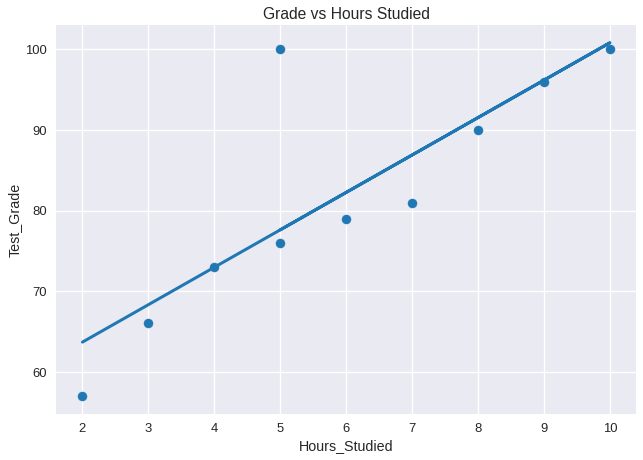

In [19]:
# Add an outlier
df.loc[9] = np.array([5, 100, np.nan])

x = df.Hours_Studied[:, np.newaxis]    # independent variable
y = df.Test_Grade.values               # dependent variable

# Train the model using the training sets
lr.fit(x, y)
print("Intercept  :", lr.intercept_)
print("Coefficient:", lr.coef_[0])

# Manual prediction for a given value of x
x_i = 6.

try:
    k = float(input("Please assign the slope (k): "))
    b = float(input("Please assign the intercept (b): "))
    y_mp = k * x_i + b
    # Manual prediction for a given value of x
    print("Manual prediction:", y_mp)
except:
    pass

# Predict using the built-in function
print("Using predict function:", lr.predict([[x_i]])[0])
y_p = lr.predict(x)

# Plot the fit line
plt.scatter(x, y)
plt.plot(x, y_p, lw=3)
plt.title("Grade vs Hours Studied")
plt.xlabel("Hours_Studied")
plt.ylabel("Test_Grade")

# Add predict value to the dataframe
df['Test_Grade_Pred'] = y_p

# Using built-in functions
print("R Squared:", r2_score(df.Test_Grade, df.Test_Grade_Pred))
print("Mean Absolute Error:", mean_absolute_error(df.Test_Grade, df.Test_Grade_Pred))
print("Root Mean Squared Error:", np.sqrt(mean_squared_error(df.Test_Grade, df.Test_Grade_Pred)))

Polynomial Regression
---------------------
> Essentially we'll be introducing higher order degree variables of the same independent variable in the equation.

| Degree | Regression Equation |
| - | :- |
| Quadratic (2) | $Y = m_1 X + m_2 X^2 + c$ |
| Cubic (3) | $Y = m_1 X + m_2 X^2 + m_3 X^3 + c$ |
| $\cdots$ | $\cdots$ |
| $N$th | $Y = m_1 X + m_2 X^2 + m_3 X^3 + \cdots + m_n X^n + c$ |

Text(0.5, 1.0, 'degree 6')

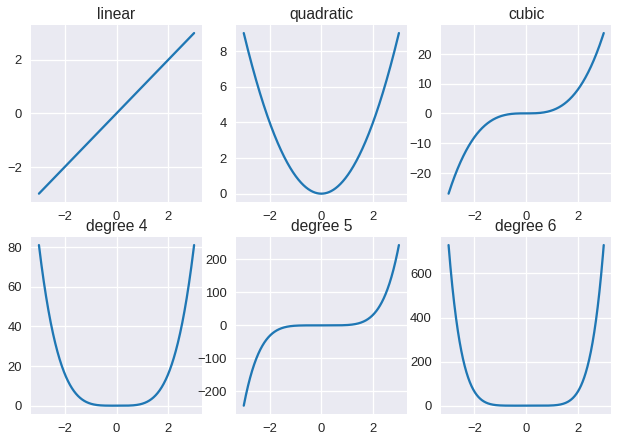

In [20]:
x = np.linspace(-3, 3, 1000)    # 1000 sample numbers between -3 and 3

# Plot subplots
fig, ax = plt.subplots(2, 3)

ax[0, 0].plot(x, x)
ax[0, 0].set_title("linear")
ax[0, 1].plot(x, x**2)
ax[0, 1].set_title("quadratic")
ax[0, 2].plot(x, x**3)
ax[0, 2].set_title("cubic")
ax[1, 0].plot(x, x**4)
ax[1, 0].set_title("degree 4")
ax[1, 1].plot(x, x**5)
ax[1, 1].set_title("degree 5")
ax[1, 2].plot(x, x**6)
ax[1, 2].set_title("degree 6")

> Let’s consider another set of students’ average test grade scores and their respective average studied hours for similar IQ students.

In [21]:
# Load data
df = pd.read_csv("../data/Grade_Set_2.csv")
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


In [22]:
# Check the correlation between variables
print("Correlation matrix:")
df.corr()

Correlation matrix:


,Hours_Studied,Test_Grade
Hours_Studied,1.000000,0.974868
Test_Grade,0.974868,1.000000


R Squared: 0.9503677766997879


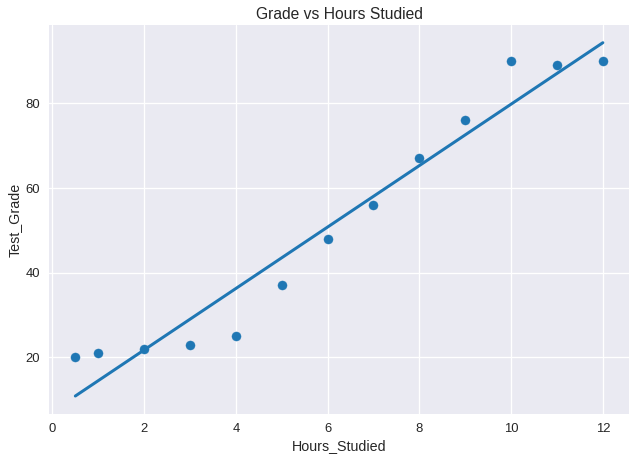

In [23]:
# Simple scatter plot
df.plot(kind="scatter", x="Hours_Studied", y="Test_Grade", title="Grade vs Hours Studied")

# Create a linear regression object
lr = lm.LinearRegression()

x = df.Hours_Studied[:, np.newaxis]    # independent variable
y = df.Test_Grade                      # dependent variable

# Train the model using the training sets
lr.fit(x, y)
y_p = lr.predict(x)

# Plot the fit line
plt.scatter(x, y)
plt.plot(x, y_p, lw=3)
plt.title("Grade vs Hours Studied")
plt.xlabel("Hours_Studied")
plt.ylabel("Test_Grade")

print("R Squared:", r2_score(y, y_p))

> Let's try higher order polynomial degrees.

R-squared for degree 1 = 0.9503677766997879
R-squared for degree 2 = 0.9608726568678714
R-squared for degree 3 = 0.9938323120374665
R-squared for degree 4 = 0.9955000184096712
R-squared for degree 5 = 0.9956204913897357


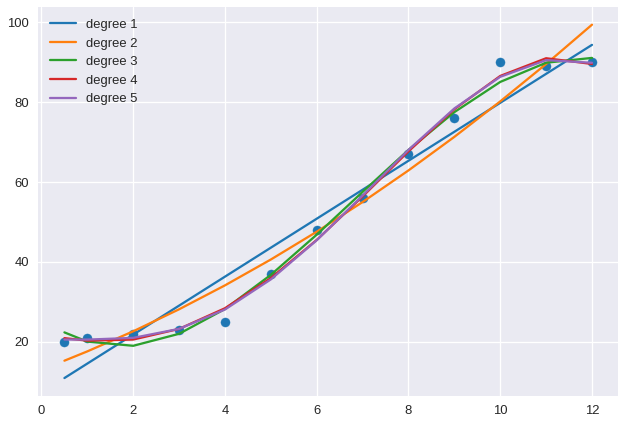

In [24]:
lr = lm.LinearRegression()

x = df.Hours_Studied
y = df.Test_Grade

# NumPy's vander method will return the Vandermonde matrix
for deg in range(1, 6):
    vdm = np.vander(x, deg+1)
    lr.fit(vdm, y)
    y_lr = lr.predict(vdm)
    plt.plot(x, y_lr, label=f"degree {deg}")
    plt.legend(loc=2)
    print(f"R-squared for degree {deg} = {r2_score(y, y_lr)}")

plt.scatter(x, y)

> Scikit-learn provides a function to generate a new feature matrix consisting of all polynomial combinations of the features with a degree less than or equal to the specified degree.

R Squared using built-in function: 0.9938323120374665


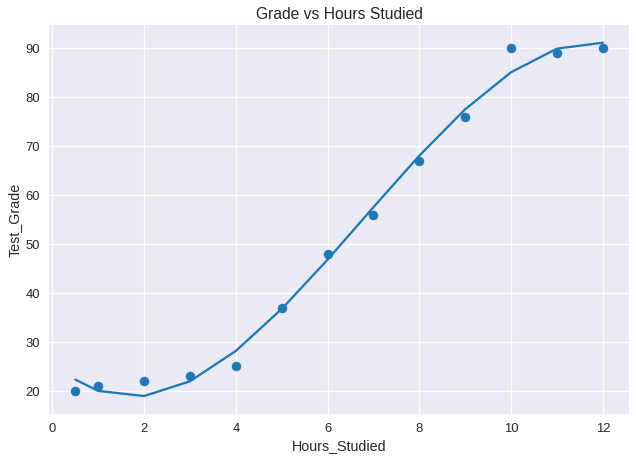

In [25]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.pipeline import make_pipeline

x = df.Hours_Studied[:, np.newaxis]
y = df.Test_Grade

degree = 3
model = make_pipeline(PolynomialFeatures(degree), lr)
model.fit(x, y)
y_p = model.predict(x)

plt.scatter(x, y)
plt.plot(x, y_p)
plt.title("Grade vs Hours Studied")
plt.xlabel("Hours_Studied")
plt.ylabel("Test_Grade")

print("R Squared using built-in function:", r2_score(y, y_p))

Multivariate Regression
-----------------------
> The equation take the following form:
\begin{equation}
y = m_1 x_1 + m_2 x_2 + m_3 x_3 + \cdots + m_n x_n,
\end{equation}
> where each independent variable is represented by $x$'s, and $m$'s are the corresponding coefficients.

> We'll be using the housing dataset, which contains sales prices of houses in the city of Windsor.

| Variable Name | Description | Data Type |
| ------------- | ----------- | --------- |
| Price         | The sale price of a house | Numeric |
| Lotsize       | The lot size of property in square feet | Numeric |
| Bedrooms      | Number of Bedrooms        | Numeric |
| Bathrms       | Number of full bathrooms  | Numeric |
| Stories       | Number of stories excluding basement| Categorical |
| Driveway      | Does the house have a driveway?     | Boolean/Categorical |
| Recroom       | Does the house have a recreational room? | Boolean/Categorical |
| Gashw         | Does the house use gas for hot water heating? | Boolean/Categorical |
| Airco         | Does the house have central air conditioning? | Boolean/Categorical |
| Garagepl      | Number of garage places   | Numeric |
| Prefarea      | Is the house located in the preferred neighborhood of the city?   | Boolean/Categorical |

> Let’s build a model to predict the house price (dependent variable) by considering the rest of the variables as independent variables. The categorical variables need to be handled appropriately before running the first iteration of the model. `Scikit-learn` provides useful built-in preprocessing functions to handle categorical variables.
> - *LabelBinarizer*: This will replace the binary variable text with numeric values. We’ll be using this function for the binary categorical variables.
> - *LabelEncoder*: This will replace category level with number representation.
> - *OneHotEncoder*: This will convert $n$ levels to an $n-1$ new variable, and the new variables will use 1 to indicate the presence of level and 0 for otherwise. Note that before calling `OneHotEncoder`, we should use LabelEncoder to convert levels to the number. Alternatively, we can achieve the same using the `get_dummies` of the `Pandas` package. This is more efficient to use, as we can directly use it on the column with text description without having to convert to numbers first.


#### Multicollinearity and Variation Inflation Factor
> Multicollinearity is an incident where one or more of the independent variables are strongly correlated with each other. In such an incident, we should use only one among correlated independent variables.

> The standard guideline for Variance Inflation Factor (VIF) value is: VIF = 1 means no correlation exists, and VIF > 1 but < 5 means moderate correation exists.
\begin{equation}
\text{VIF}_i = \frac{1}{1 - R_i^2}
\end{equation}
where $R_i^2$ is the coefficient of determination of variable $X_i$.

In [26]:
# Load data
df = pd.read_csv("../data/Housing_Modified.csv")
df

,price,lotsize,bedrooms,bathrms,stories,driveway,recroom,fullbase,gashw,airco,garagepl,prefarea
0,42000.0,5850,3,1,two,yes,no,yes,no,no,1,no
1,38500.0,4000,2,1,one,yes,no,no,no,no,0,no
2,49500.0,3060,3,1,one,yes,no,no,no,no,0,no
3,60500.0,6650,3,1,two,yes,yes,no,no,no,0,no
4,61000.0,6360,2,1,one,yes,no,no,no,no,0,no
...,...,...,...,...,...,...,...,...,...,...,...,...
541,91500.0,4800,3,2,four,yes,yes,no,no,yes,0,no
542,94000.0,6000,3,2,four,yes,no,no,no,yes,0,no
543,103000.0,6000,3,2,four,yes,yes,no,no,yes,1,no
544,105000.0,6000,3,2,two,yes,yes,no,no,yes,1,no


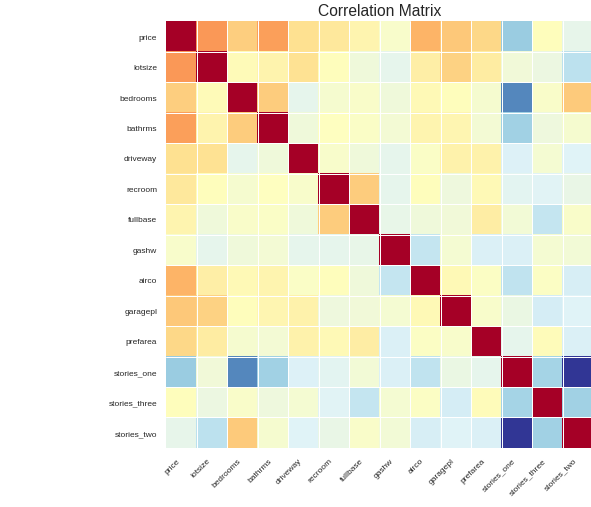

In [27]:
# Convert binary fields to numeric boolean fields
lb = preprocessing.LabelBinarizer()

df.driveway = lb.fit_transform(df.driveway)
df.recroom = lb.fit_transform(df.recroom)
df.fullbase = lb.fit_transform(df.fullbase)
df.gashw = lb.fit_transform(df.gashw)
df.airco = lb.fit_transform(df.airco)
df.prefarea = lb.fit_transform(df.prefarea)

# Create dummy variables for stories
df_stories = pd.get_dummies(df['stories'], prefix="stories", drop_first=True)

# Join the dummy variables to the main dataframe
df = pd.concat([df, df_stories], axis=1)
del df['stories']

# Plot the correlation matrix using statsmodels graphics' plot_corr
# Create correlation matrix
corr = df.corr()
sm.graphics.plot_corr(corr, xnames=list(corr.columns))
plt.grid(False)

> We can see from the plot that `stories_one` has a strong negative correlation with `stories_two`. Let’s perform the VIF analysis to eliminate strongly correlated independent variables.

In [28]:
from statsmodels.stats.outliers_influence import variance_inflation_factor, OLSInfluence

# Create a Python list of feature names
dependent_variable = 'price'
l = df.keys().tolist()
l.remove(dependent_variable)
independent_variables = l

# Select the subset
X = df[independent_variables]
y = df[dependent_variable]

thresh = 10

for i in np.arange(ncol := len(independent_variables)):
    vif = [variance_inflation_factor(X[independent_variables].values,
           ix) for ix in range(ncol)]
    if (mvif := max(vif)) > thresh:
        max_ind = vif.index(mvif)
        print(f"{vif = }\n")
        print(f"dropping '{X[independent_variables].columns[max_ind]}' at index: {str(max_ind)}")
        independent_variables.pop(max_ind)
        ncol = len(independent_variables)
    else:
        break
print("Final variables:", independent_variables)

vif = [8.958098087844336, 18.469878559519948, 8.984672347290864, 7.088578542091886, 1.4770152815033917, 2.013320236472385, 1.1034879198994194, 1.756746206560902, 1.9826489313438442, 1.5332946465459893, 3.965752674786861, 1.7700402770614867, 5.511702408354892]

dropping 'bedrooms' at index: 1
Final variables: ['lotsize', 'bathrms', 'driveway', 'recroom', 'fullbase', 'gashw', 'airco', 'garagepl', 'prefarea', 'stories_one', 'stories_three', 'stories_two']


> The previous VIF analysis has eliminated bedrooms greater than 10; however, stories_one and stories_two have been retained.
> Let's run the first iteration of a multivariate regression model with the set of independent variables that have passed the VIF analysis.
> To test the model performance, the common practice is to split the data set into 80/20 (or 70/30) for train/test, respectively.

In [29]:
from sklearn.model_selection import train_test_split
from sklearn import metrics

# Inherit the list of feature names
independent_variables = l

# Select the subset
X = df[independent_variables]

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1)

# Build the model
lm = sm.OLS(y_train, X_train).fit()

print(lm.summary())

# Make predictions on the testing set
y_train_pred = lm.predict(X_train)
y_test_pred = lm.predict(X_test)
y_pred = lm.predict(X)

print("Train MAE :", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print("Test  MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test  RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

OLS Regression Results                                
Dep. Variable:                  price   R-squared (uncentered):                   0.954
Model:                            OLS   Adj. R-squared (uncentered):              0.953
Method:                 Least Squares   F-statistic:                              731.3
Date:                Sat, 18 Jul 2020   Prob (F-statistic):                   1.46e-274
Time:                        22:04:54   Log-Likelihood:                         -4828.1
No. Observations:                 436   AIC:                                      9680.
Df Residuals:                     424   BIC:                                      9729.
Df Model:                          12                                                  
Covariance Type:            nonrobust                                                  
                    coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------------------------------------

### Regression Diagnostics
> There are a set of procedures and assumptions that need to be verified about our model results, otherwise the model could be misleading. Let's look at some of the important regression diagnostics.

#### Outliers
> Data points that are far away from the fitted regression line are called *outliers*. Plotting normalized residual vs. leverage will give us a good understanding of the outlier's points. *Residual* is the difference between actual vs. predicted, and *leverage* is a measure of how far away the independent variable values of observation are from those of the other observations.

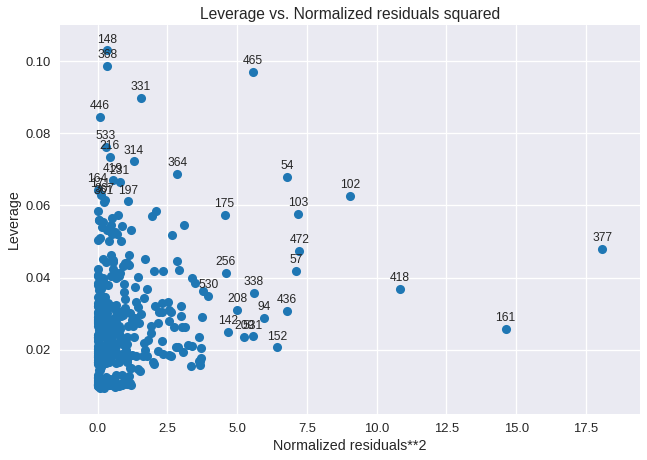

In [30]:
from statsmodels.graphics.regressionplots import plot_leverage_resid2

fig, ax = plt.subplots()
fig = plot_leverage_resid2(lm, ax=ax)

> Running a Bonferroni outlier test will give us $p$-values for each observation, and those observations with $p < 0.05$ are the outliers affecting the accuracy.

In [31]:
# Bonferroni outlier test
test = lm.outlier_test()

print("Bad data points [bonf(p) < 0.05]:")
test[test['bonf(p)'] < 0.05]

Bad data points [bonf(p) < 0.05]:


,student_resid,unadj_p,bonf(p)
161,3.925355,0.000101,0.044067
377,4.430868,0.000012,0.005219


#### Homoscedasticity and Normallity
> The error variance should be constant, which is known as *homoscedasticity*, and the error should be normally distributed.

Text(0, 0.5, 'Observation Numbers')

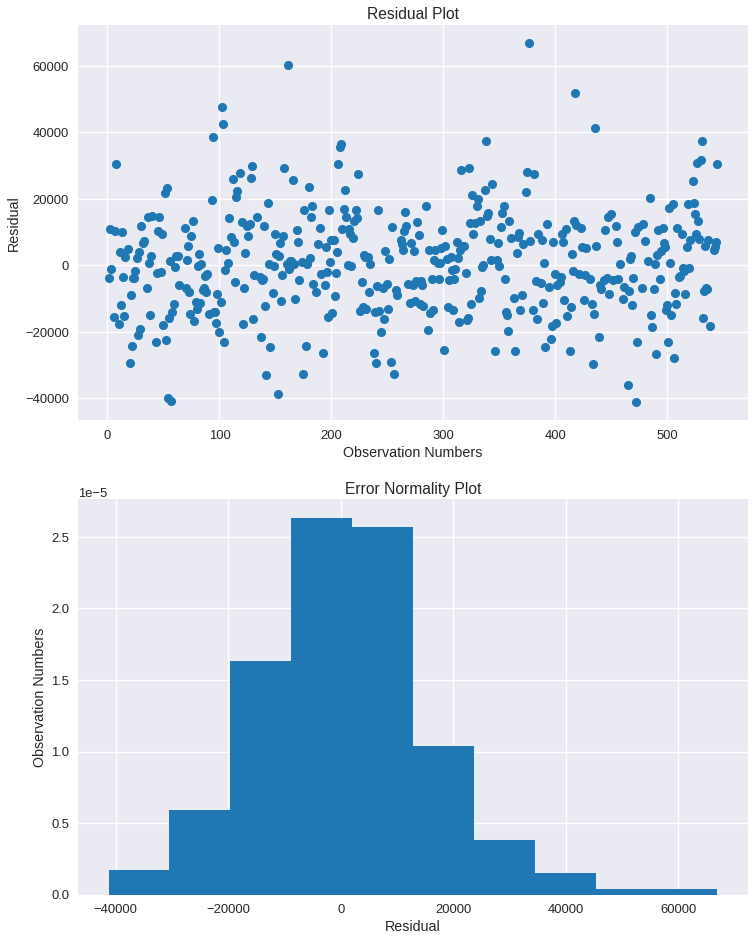

In [32]:
# Plot to check homoscedasticity
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 16))

ax1.plot(lm.resid, 'o')
ax1.set_title("Residual Plot")
ax1.set_xlabel("Observation Numbers")
ax1.set_ylabel("Residual")

ax2.hist(lm.resid, density=True)
ax2.set_title("Error Normality Plot")
ax2.set_xlabel("Residual")
ax2.set_ylabel("Observation Numbers")

> The relationships between the predictors and the outcome variable should be linear. If the relationship is not linear then appropriate transformation (such as log, square root, and higher order polynomials, etc.) should be applied to the dependent/independent variable to fix the issue.

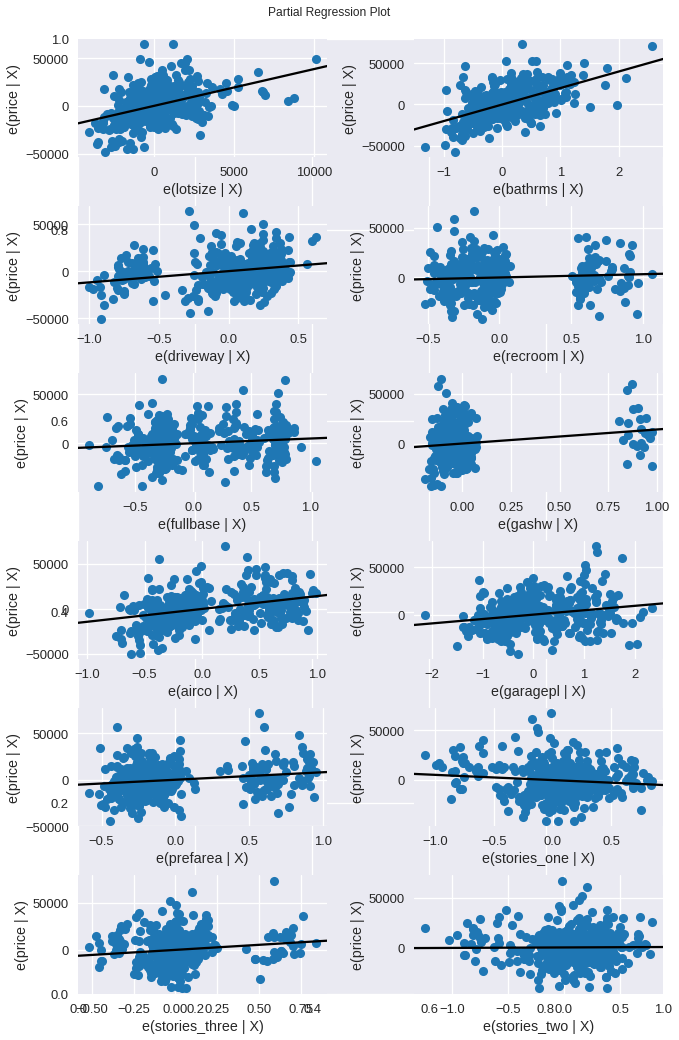

In [33]:
# Linearity plots
fig, ax = plt.subplots(figsize=(10, 15))
fig = sm.graphics.plot_partregress_grid(lm, fig=fig)

#### Overfitting and Underfitting
> *Underfitting* occurs when the model does not fit the data well and is unable to capture the underlying trend in it. In this case, we can notice a low accuracy in training and test data set.

> *Overfitting* occurs when the model fits the data too well, capturing all the noises. In this case, we can notice a high accuracy in the training data set, whereas the same model will result in a low accuracy on the test data set.


Regularization
--------------
> With the increase in a number of variables and the increase in model complexity, the probability of overfitting also increases. Regularization is a technique to avoid the **overfitting** problem.

> *LASSO*: This provides a sparse solution, also known as *L1 regularization*. It guides parameter value to be zero (i.e., the coefficients of the variables that add minor value to the model will be zero), and adds a penalty equivalent to the absolute value of the magnitude of coefficients.

> *Ridge regression*: Also known as *Tikhonov (L2) regularization*. It guides parameters to be close to zero but not zero. You can use this when you have many variables that add minor value to the model accuracy individually, however overall improve the model accuracy and cannot be excluded from the model. Ridge regression will apply a penalty to reduce the magnitude of the coefficient of all variables that add minor value to the model accuracy, adding penalty equivalent to the square of the magnitude of coefficients.

In [34]:
from sklearn import linear_model

# Load data
df = pd.read_csv("../data/Grade_Set_2.csv")
df

,Hours_Studied,Test_Grade
0,0.5,20
1,1.0,21
2,2.0,22
3,3.0,23
4,4.0,25
5,5.0,37
6,6.0,48
7,7.0,56
8,8.0,67
9,9.0,76


In [35]:
df.columns = ['x', 'y']

for i in range(2, 50):      # power of 1 is already there
    colname = f'x_{i}'      # new colname will be x_power
    df[colname] = df['x']**i

independent_variables = list(df.columns)
independent_variables.remove('y')

X = df[independent_variables]
y = df.y

# Split data into train and test
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=.8, random_state=1)

# Ridge regression
lr = linear_model.Ridge(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("-" * 5 + " Ridge Regression " + "-" * 5)
print("Train MAE :", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print("Test  MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test  RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Ridge Coef:")
lr.coef_

----- Ridge Regression -----
Train MAE : 13.23303648873574
Train RMSE: 16.87259547067167
Test  MAE : 21.973745021751768
Test  RMSE: 22.009112336405487
Ridge Coef:


array([ 8.67127091e-89,  1.13658541e-87,  1.29054357e-86,  1.39193904e-85,
        1.46163224e-84,  1.51065504e-83,  1.54557648e-82,  1.57047809e-81,
        1.58797156e-80,  1.59977083e-79,  1.60702465e-78,  1.61051501e-77,
        1.61077848e-76,  1.60818239e-75,  1.60297372e-74,  1.59531134e-73,
        1.58528767e-72,  1.57294361e-71,  1.55827906e-70,  1.54126043e-69,
        1.52182627e-68,  1.49989158e-67,  1.47535130e-66,  1.44808334e-65,
        1.41795140e-64,  1.38480789e-63,  1.34849705e-62,  1.30885857e-61,
        1.26573196e-60,  1.21896180e-59,  1.16840429e-58,  1.11393537e-57,
        1.05546076e-56,  9.92928513e-56,  9.26344513e-55,  8.55791671e-54,
        7.81453618e-53,  7.03643862e-52,  6.22841607e-51,  5.39735647e-50,
        4.55278070e-49,  3.70749814e-48,  2.87840597e-47,  2.08746206e-46,
        1.36286766e-45,  7.40503400e-45,  2.65671003e-44, -4.79631528e-45,
        2.10847992e-46])

In [36]:
# LASSO regression
lr = linear_model.Lasso(alpha=0.001)
lr.fit(X_train, y_train)
y_train_pred = lr.predict(X_train)
y_test_pred = lr.predict(X_test)

print("-" * 5 + " LASSO Regression " + "-" * 5)
print("Train MAE :", metrics.mean_absolute_error(y_train, y_train_pred))
print("Train RMSE:", np.sqrt(metrics.mean_squared_error(y_train, y_train_pred)))

print("Test  MAE :", metrics.mean_absolute_error(y_test, y_test_pred))
print("Test  RMSE:", np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

print("Ridge Coef:")
lr.coef_

----- LASSO Regression -----
Train MAE : 0.8423742988874459
Train RMSE: 1.2191291855605888
Test  MAE : 4.323647594043465
Test  RMSE: 4.872324349696699
Ridge Coef:


array([ 1.29948409e+00,  3.92103580e-01,  1.75369422e-02,  7.79647589e-04,
        3.02339084e-05,  3.35699852e-07, -1.13749601e-07, -1.79773817e-08,
       -1.93826156e-09, -1.78643532e-10, -1.50240566e-11, -1.18610891e-12,
       -8.91794276e-14, -6.43309631e-15, -4.46487394e-16, -2.97784537e-17,
       -1.89686955e-18, -1.13767046e-19, -6.22157254e-21, -2.84658206e-22,
       -7.32019963e-24,  5.16015995e-25,  1.18616856e-25,  1.48398312e-26,
        1.55203577e-27,  1.48667153e-28,  1.35117812e-29,  1.18576052e-30,
        1.01487234e-31,  8.52473862e-33,  7.05722034e-34,  5.77507464e-35,
        4.68162529e-36,  3.76585569e-37,  3.00961249e-38,  2.39206785e-39,
        1.89235649e-40,  1.49102460e-41,  1.17072537e-42,  9.16453614e-44,
        7.15512017e-45,  5.57333358e-46,  4.33236496e-47,  3.36163309e-48,
        2.60423554e-49,  2.01461728e-50,  1.55652093e-51,  1.20123190e-52,
        9.26105400e-54])

Nonlinear Regression
--------------------

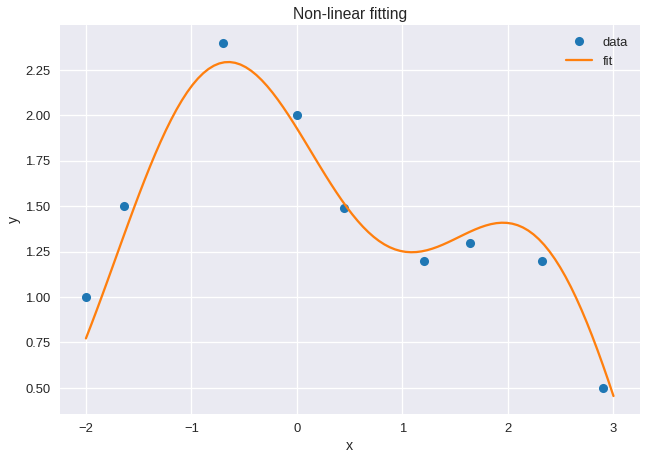

In [37]:
from scipy.optimize import curve_fit

x= np.array([-2, -1.64, -0.7, 0, 0.45, 1.2, 1.64, 2.32, 2.9])
y = np.array([1.0, 1.5, 2.4, 2.0, 1.49, 1.2, 1.3, 1.2, 0.5])

# Function for non-linear curve fitting
def func(x, p1, p2):
    return p1 * np.sin(p2 * x) + p2 * np.cos(p1 * x)

popt, pcov = curve_fit(func, x, y, p0=(1.0, 0.2))

p1 = popt[0]
p2 = popt[1]
residuals = y - func(x, p1, p2)
fres = sum(residuals**2)

curvex = np.linspace(-2, 3, 100)
curvey = func(curvex, p1, p2)

plt.plot(x, y, 'o')
plt.plot(curvex, curvey)
plt.title("Non-linear fitting")
plt.xlabel("x")
plt.ylabel("y")
plt.legend(['data', 'fit'], loc='best')